<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Decision_tree_classification_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
data = pd.read_csv('/content/Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Perform EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [7]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

Convert Sales dataset into 3 classes with labels Good, Medium and Bad.

In [9]:
data_cl = data.copy()

In [10]:
data_cl['Sales'] = pd.cut(data_cl['Sales'], bins=(0,4,10,17), labels = ('Bad','Medium','Good'))

In [11]:
data_cl 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Good,111,48,16,260,83,Good,65,10,Yes,Yes
2,Good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Medium,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Good,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
data_cl = pd.get_dummies(data_cl, columns=['Urban','US'], drop_first = True)

In [13]:
data_cl['Sales'] = data_cl['Sales'].map({'Good':2, 'Medium':1,'Bad':0})

In [14]:
data_cl['ShelveLoc'] = data_cl['ShelveLoc'].map({'Good':2, 'Medium':1,'Bad':0})

In [15]:
data_cl

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,2,65,10,1,1
2,2,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,2,33,14,1,1
396,1,139,23,3,37,120,1,55,11,0,1
397,1,162,26,12,368,159,1,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [16]:
data_cl = data_cl.rename({'Urban_Yes':'Urban','US_Yes':'US'},axis=1)

In [17]:
data_cl

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,2,65,10,1,1
2,2,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,2,33,14,1,1
396,1,139,23,3,37,120,1,55,11,0,1
397,1,162,26,12,368,159,1,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [18]:
data_cl = data_cl.dropna()

In [19]:
data_cl

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,2,65,10,1,1
2,2,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,2,33,14,1,1
396,1,139,23,3,37,120,1,55,11,0,1
397,1,162,26,12,368,159,1,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


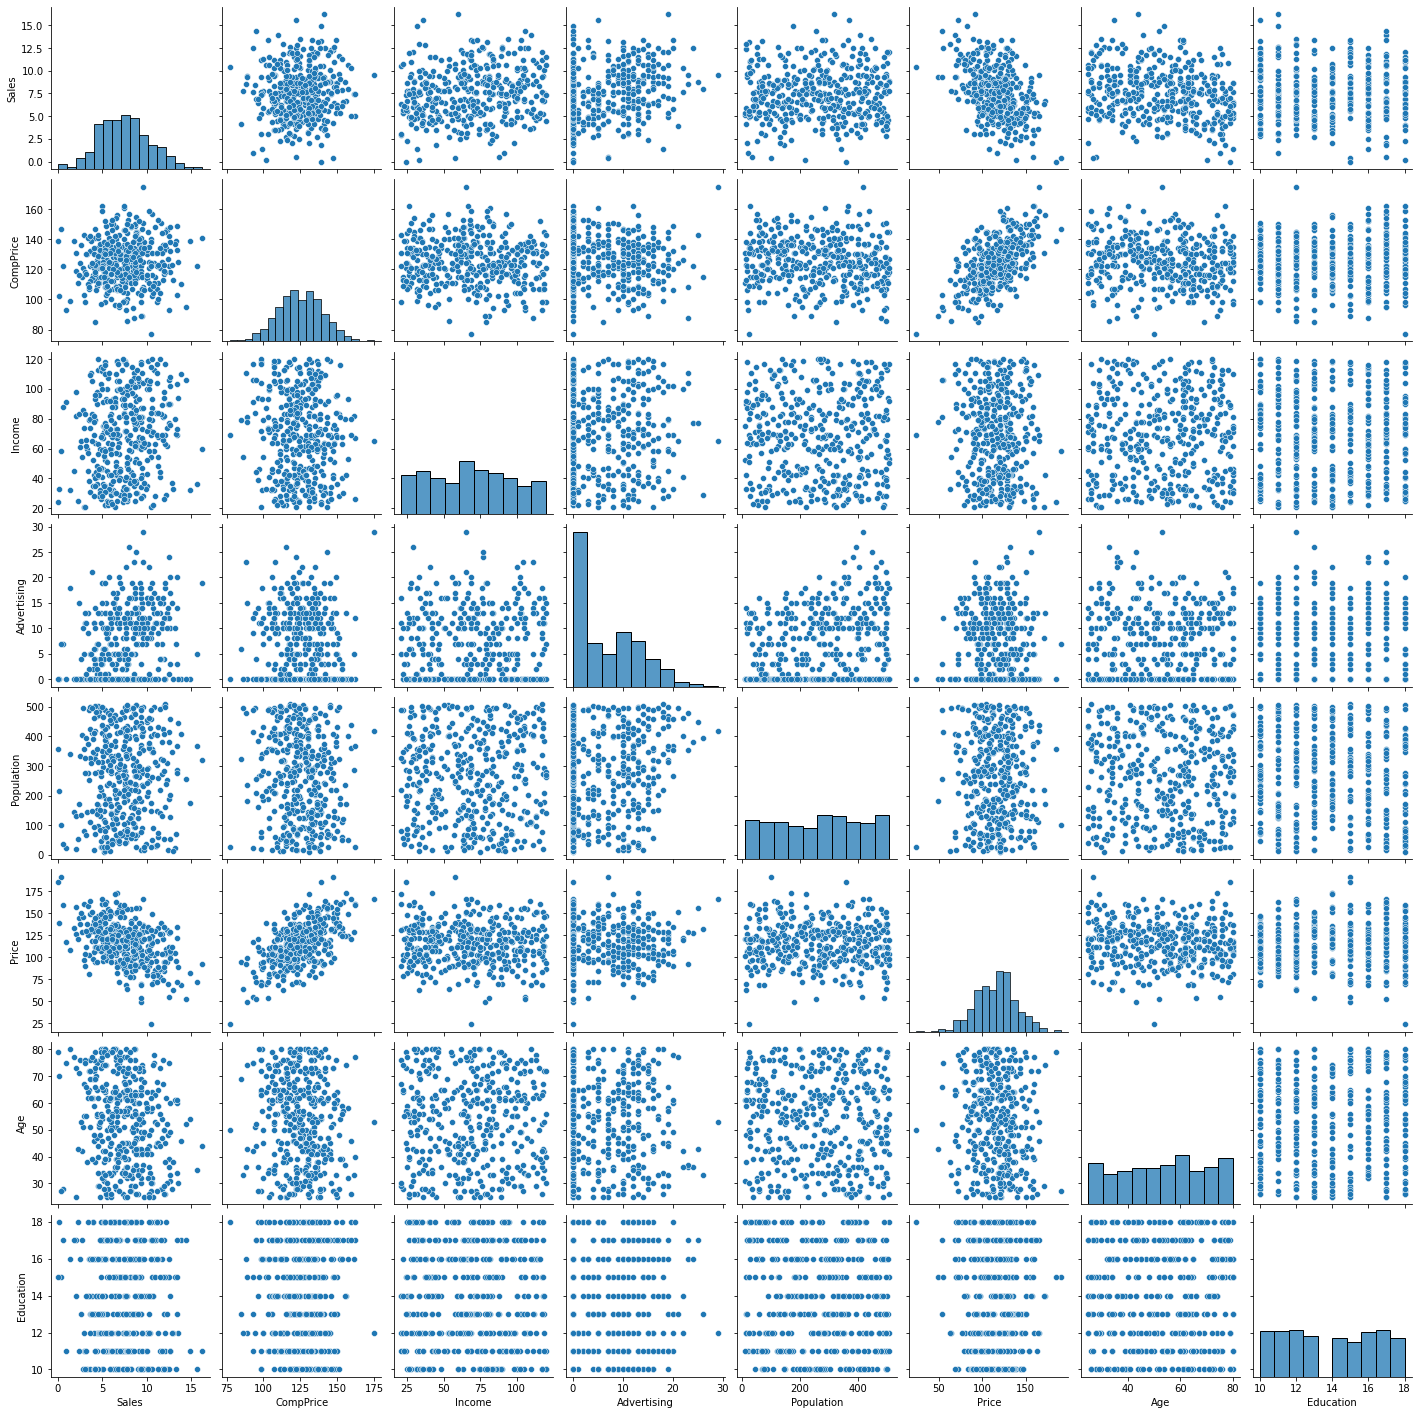

In [20]:
sns.pairplot(data)

In [21]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


Model building

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
seed = 30

In [24]:
x = data_cl.drop('Sales',axis=1)

In [25]:
y = data_cl['Sales']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=seed)

In [27]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
80,113,100,16,353,79,0,68,11,1,1
199,122,88,5,335,126,1,64,14,1,1
263,116,26,6,434,115,1,25,17,1,1
329,100,54,9,433,89,2,45,12,1,1
157,121,58,8,249,90,1,48,13,0,1
...,...,...,...,...,...,...,...,...,...,...
310,175,65,29,419,166,1,53,12,1,1
387,142,73,14,238,115,1,73,14,0,1
140,133,60,10,277,129,1,45,18,1,1
302,108,77,13,388,110,0,74,14,1,1


In [28]:
y_train

80     1
199    1
263    1
329    2
157    2
      ..
310    1
387    1
140    1
302    1
294    2
Name: Sales, Length: 279, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [41]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3, max_leaf_nodes=25, min_samples_leaf=6)

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, min_samples_leaf=6)

In [43]:
model.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=3, max_leaf_nodes=25, min_samples_leaf=6)>

In [44]:
y_pred = model.predict(x_test)

In [45]:
np.mean(y_test==y_pred)

0.7833333333333333

Hyperparameter tuning using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
model = DecisionTreeClassifier(criterion='gini')

In [49]:
params = {'max_depth':range(1,10),'max_leaf_nodes':range(15,31),'min_samples_leaf':range(1,10)}

In [50]:
grid = GridSearchCV(model, param_grid=params, scoring='accuracy',cv=6,return_train_score=True)

In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(15, 31),
                         'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [52]:
grid.best_params_

{'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 5}

In [53]:
grid.best_score_

0.7566296638914586

In [54]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15, min_samples_leaf=5)

In [55]:
res = grid.cv_results_

In [56]:
pred = grid.best_estimator_.predict(x_test)

In [57]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [58]:
np.mean(pred==y_test)

0.7833333333333333

Model Building

In [74]:
model_final = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=15,min_samples_leaf=5)

In [75]:
model_final.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15, min_samples_leaf=5)

In [76]:
y_pred_gini = model_final.predict(x_test)

In [77]:
y_pred_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [78]:
accu_gini = np.mean(y_test==y_pred_gini)

In [79]:
accu_gini

0.7833333333333333

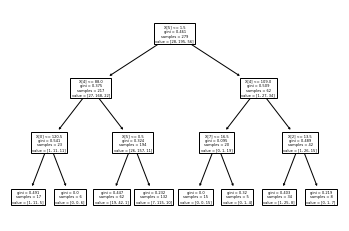

In [80]:
tree_gini = plot_tree(model_final)

[Text(0.5, 0.875, 'Price <= 1.5\ngini = 0.461\nsamples = 279\nvalue = [28, 195, 56]\nclass = 1'),
 Text(0.25, 0.625, 'Population <= 88.0\ngini = 0.375\nsamples = 217\nvalue = [27, 168, 22]\nclass = 1'),
 Text(0.125, 0.375, 'ShelveLoc <= 120.5\ngini = 0.541\nsamples = 23\nvalue = [1, 11, 11]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.491\nsamples = 17\nvalue = [1, 11, 5]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]\nclass = 2'),
 Text(0.375, 0.375, 'Price <= 0.5\ngini = 0.324\nsamples = 194\nvalue = [26, 157, 11]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.447\nsamples = 62\nvalue = [19, 42, 1]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.232\nsamples = 132\nvalue = [7, 115, 10]\nclass = 1'),
 Text(0.75, 0.625, 'Population <= 109.0\ngini = 0.509\nsamples = 62\nvalue = [1, 27, 34]\nclass = 2'),
 Text(0.625, 0.375, 'Education <= 16.5\ngini = 0.095\nsamples = 20\nvalue = [0, 1, 19]\nclass = 2'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0

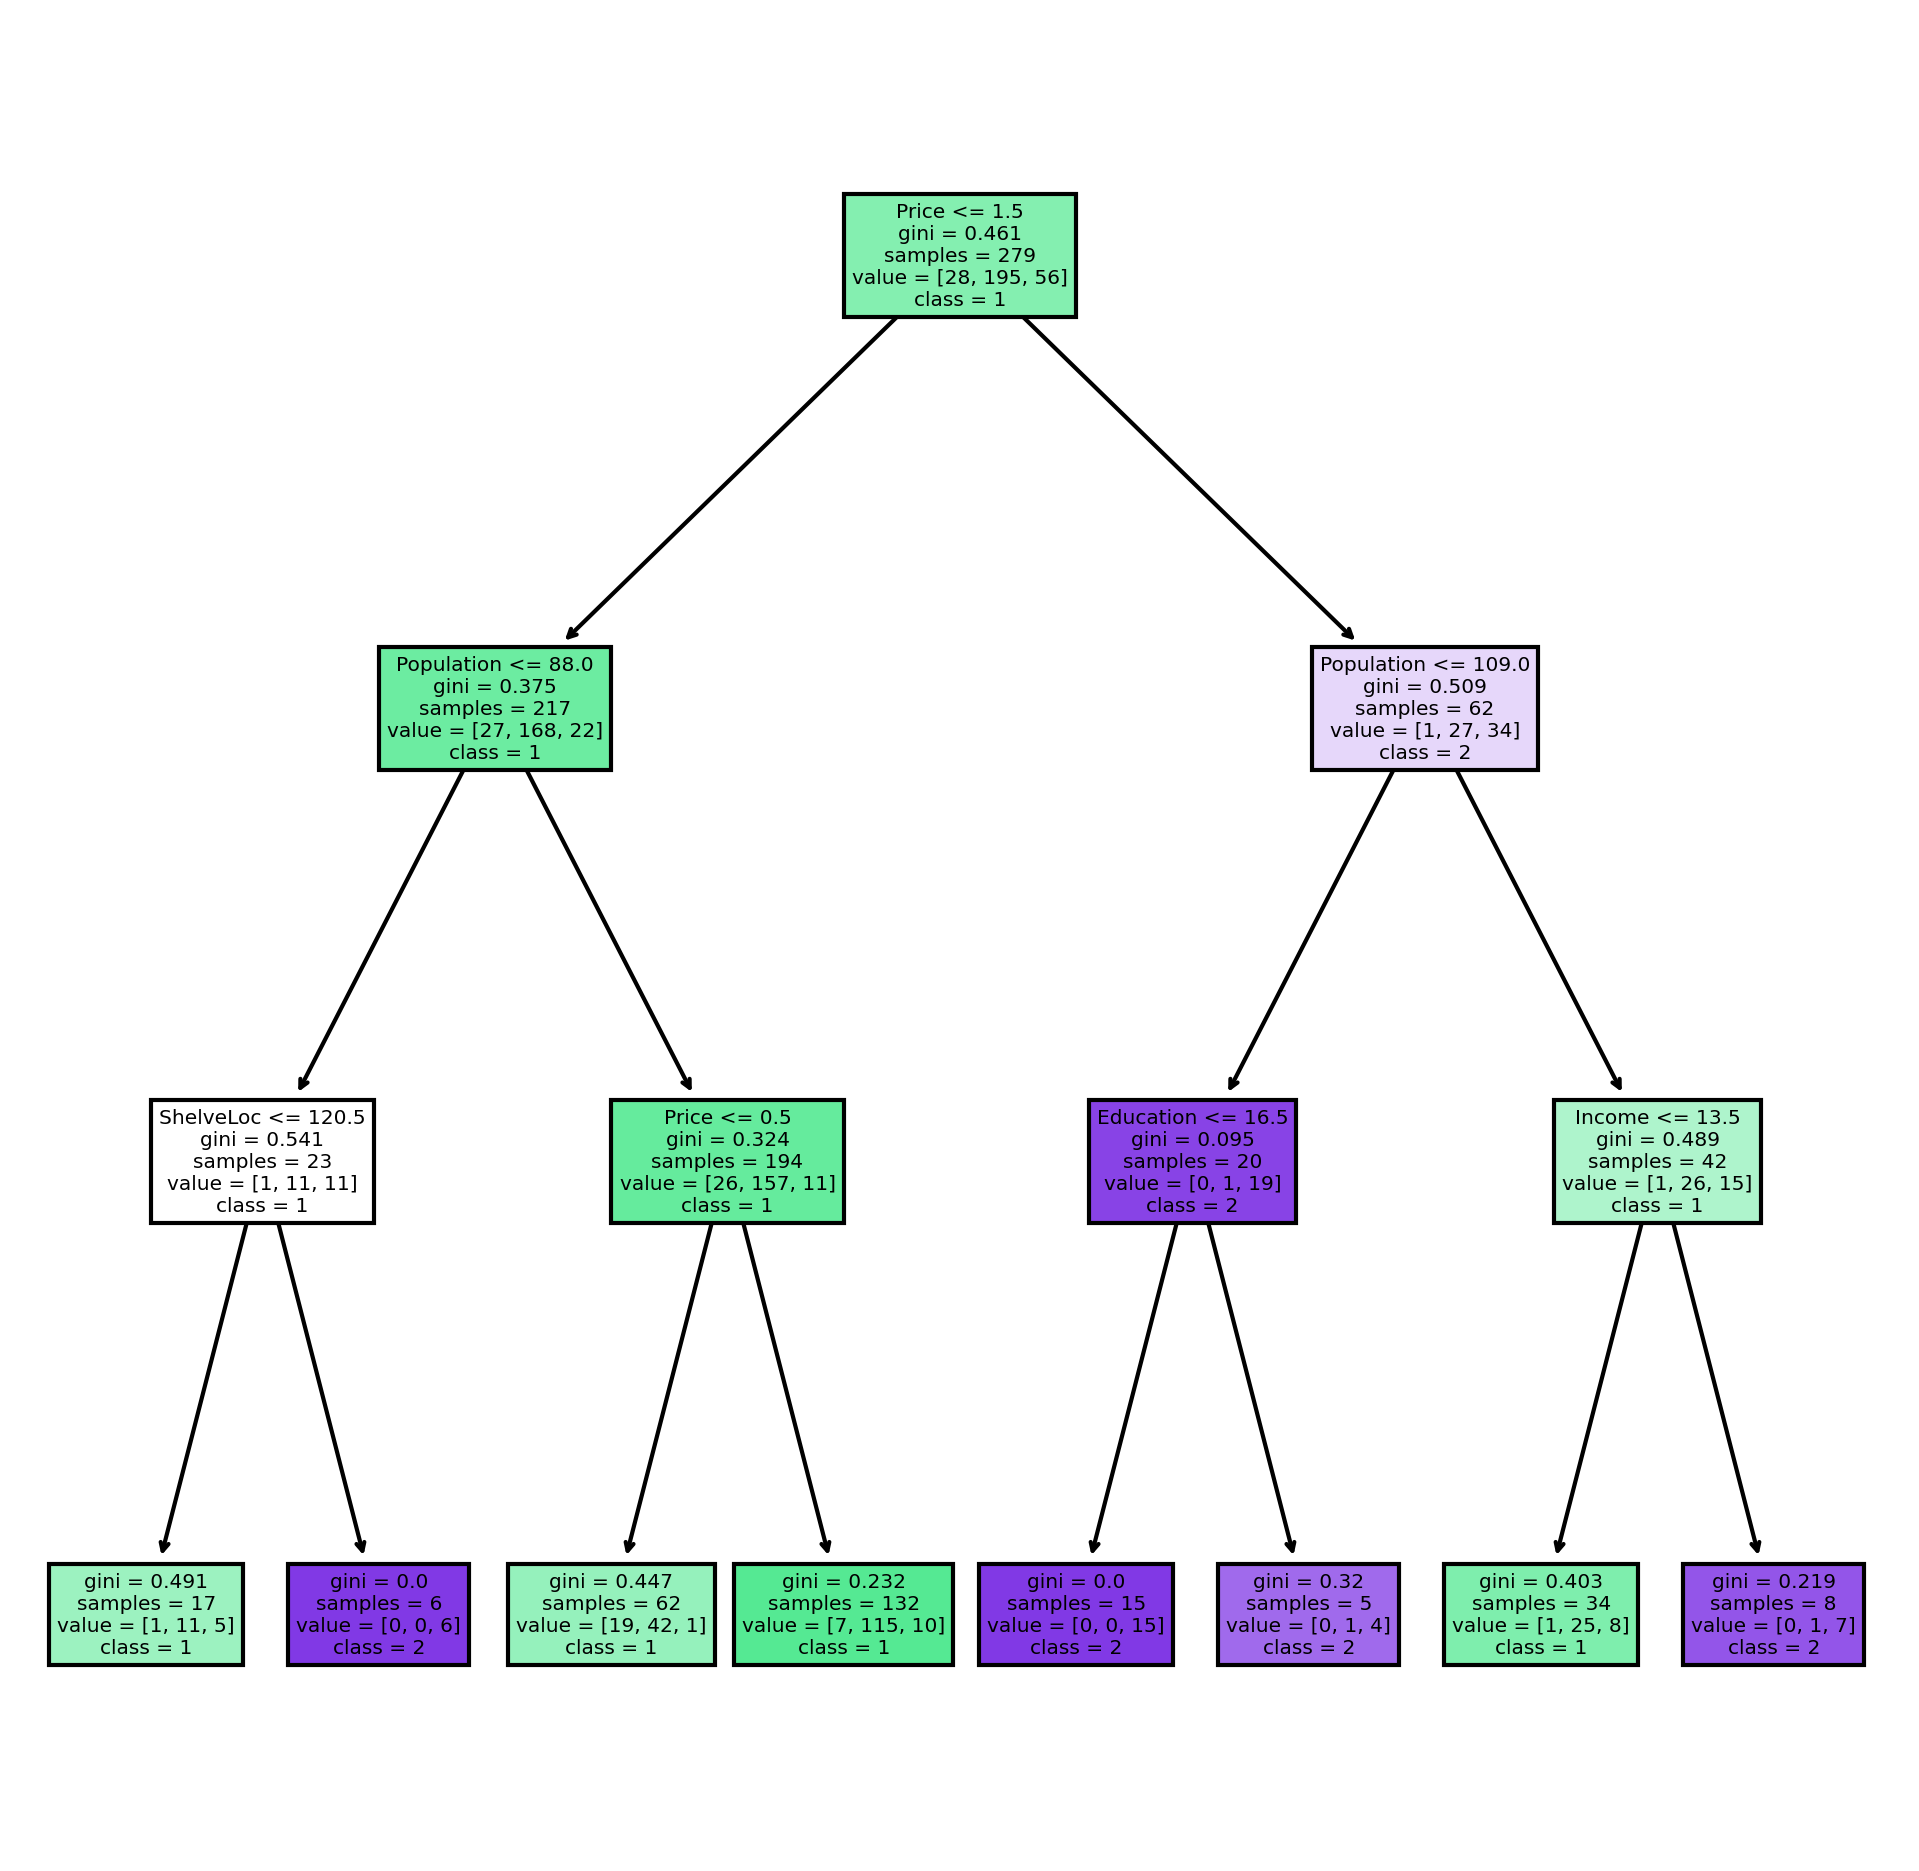

In [81]:
fn=['ShelveLoc','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']
cn=['0', '1', '2']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
plot_tree(model_final,feature_names=fn,class_names=cn,filled=True)

In [82]:
model_fin = DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=15,min_samples_leaf=5)

In [83]:
model_fin.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=15,
                       min_samples_leaf=5)

In [84]:
y_pred_ent = model_fin.predict(x_test)

In [85]:
accu_ent = np.mean(y_pred_ent==y_test)

In [86]:
accu_ent

0.775

In [87]:
model_ent = DecisionTreeClassifier(criterion='entropy')

In [88]:
params_ent = {'max_depth':range(1,10),'max_leaf_nodes':range(15,31),'min_samples_leaf':range(1,10)}

In [89]:
grid_ent = GridSearchCV(model_ent, param_grid=params_ent, scoring='accuracy',cv=6,return_train_score=True)

In [90]:
grid_ent.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(15, 31),
                         'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [97]:
best = grid_ent.best_params_

Final entropy model

In [92]:
model_entro = DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=15,min_samples_leaf=1)

In [93]:
model_entro.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=15)

In [94]:
y_pred_entro = model_entro.predict(x_test)

In [100]:
accu_entro = np.mean(y_test==y_pred_entro)*100

In [101]:
accu_entro

79.16666666666666

[Text(0.5, 0.8333333333333334, 'Price <= 1.5\nentropy = 1.159\nsamples = 279\nvalue = [28, 195, 56]\nclass = 1'),
 Text(0.25, 0.5, 'Population <= 94.5\nentropy = 0.995\nsamples = 217\nvalue = [27, 168, 22]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.206\nsamples = 40\nvalue = [2, 23, 15]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.819\nsamples = 177\nvalue = [25, 145, 7]\nclass = 1'),
 Text(0.75, 0.5, 'Population <= 109.0\nentropy = 1.094\nsamples = 62\nvalue = [1, 27, 34]\nclass = 2'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.286\nsamples = 20\nvalue = [0, 1, 19]\nclass = 2'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.087\nsamples = 42\nvalue = [1, 26, 15]\nclass = 1')]

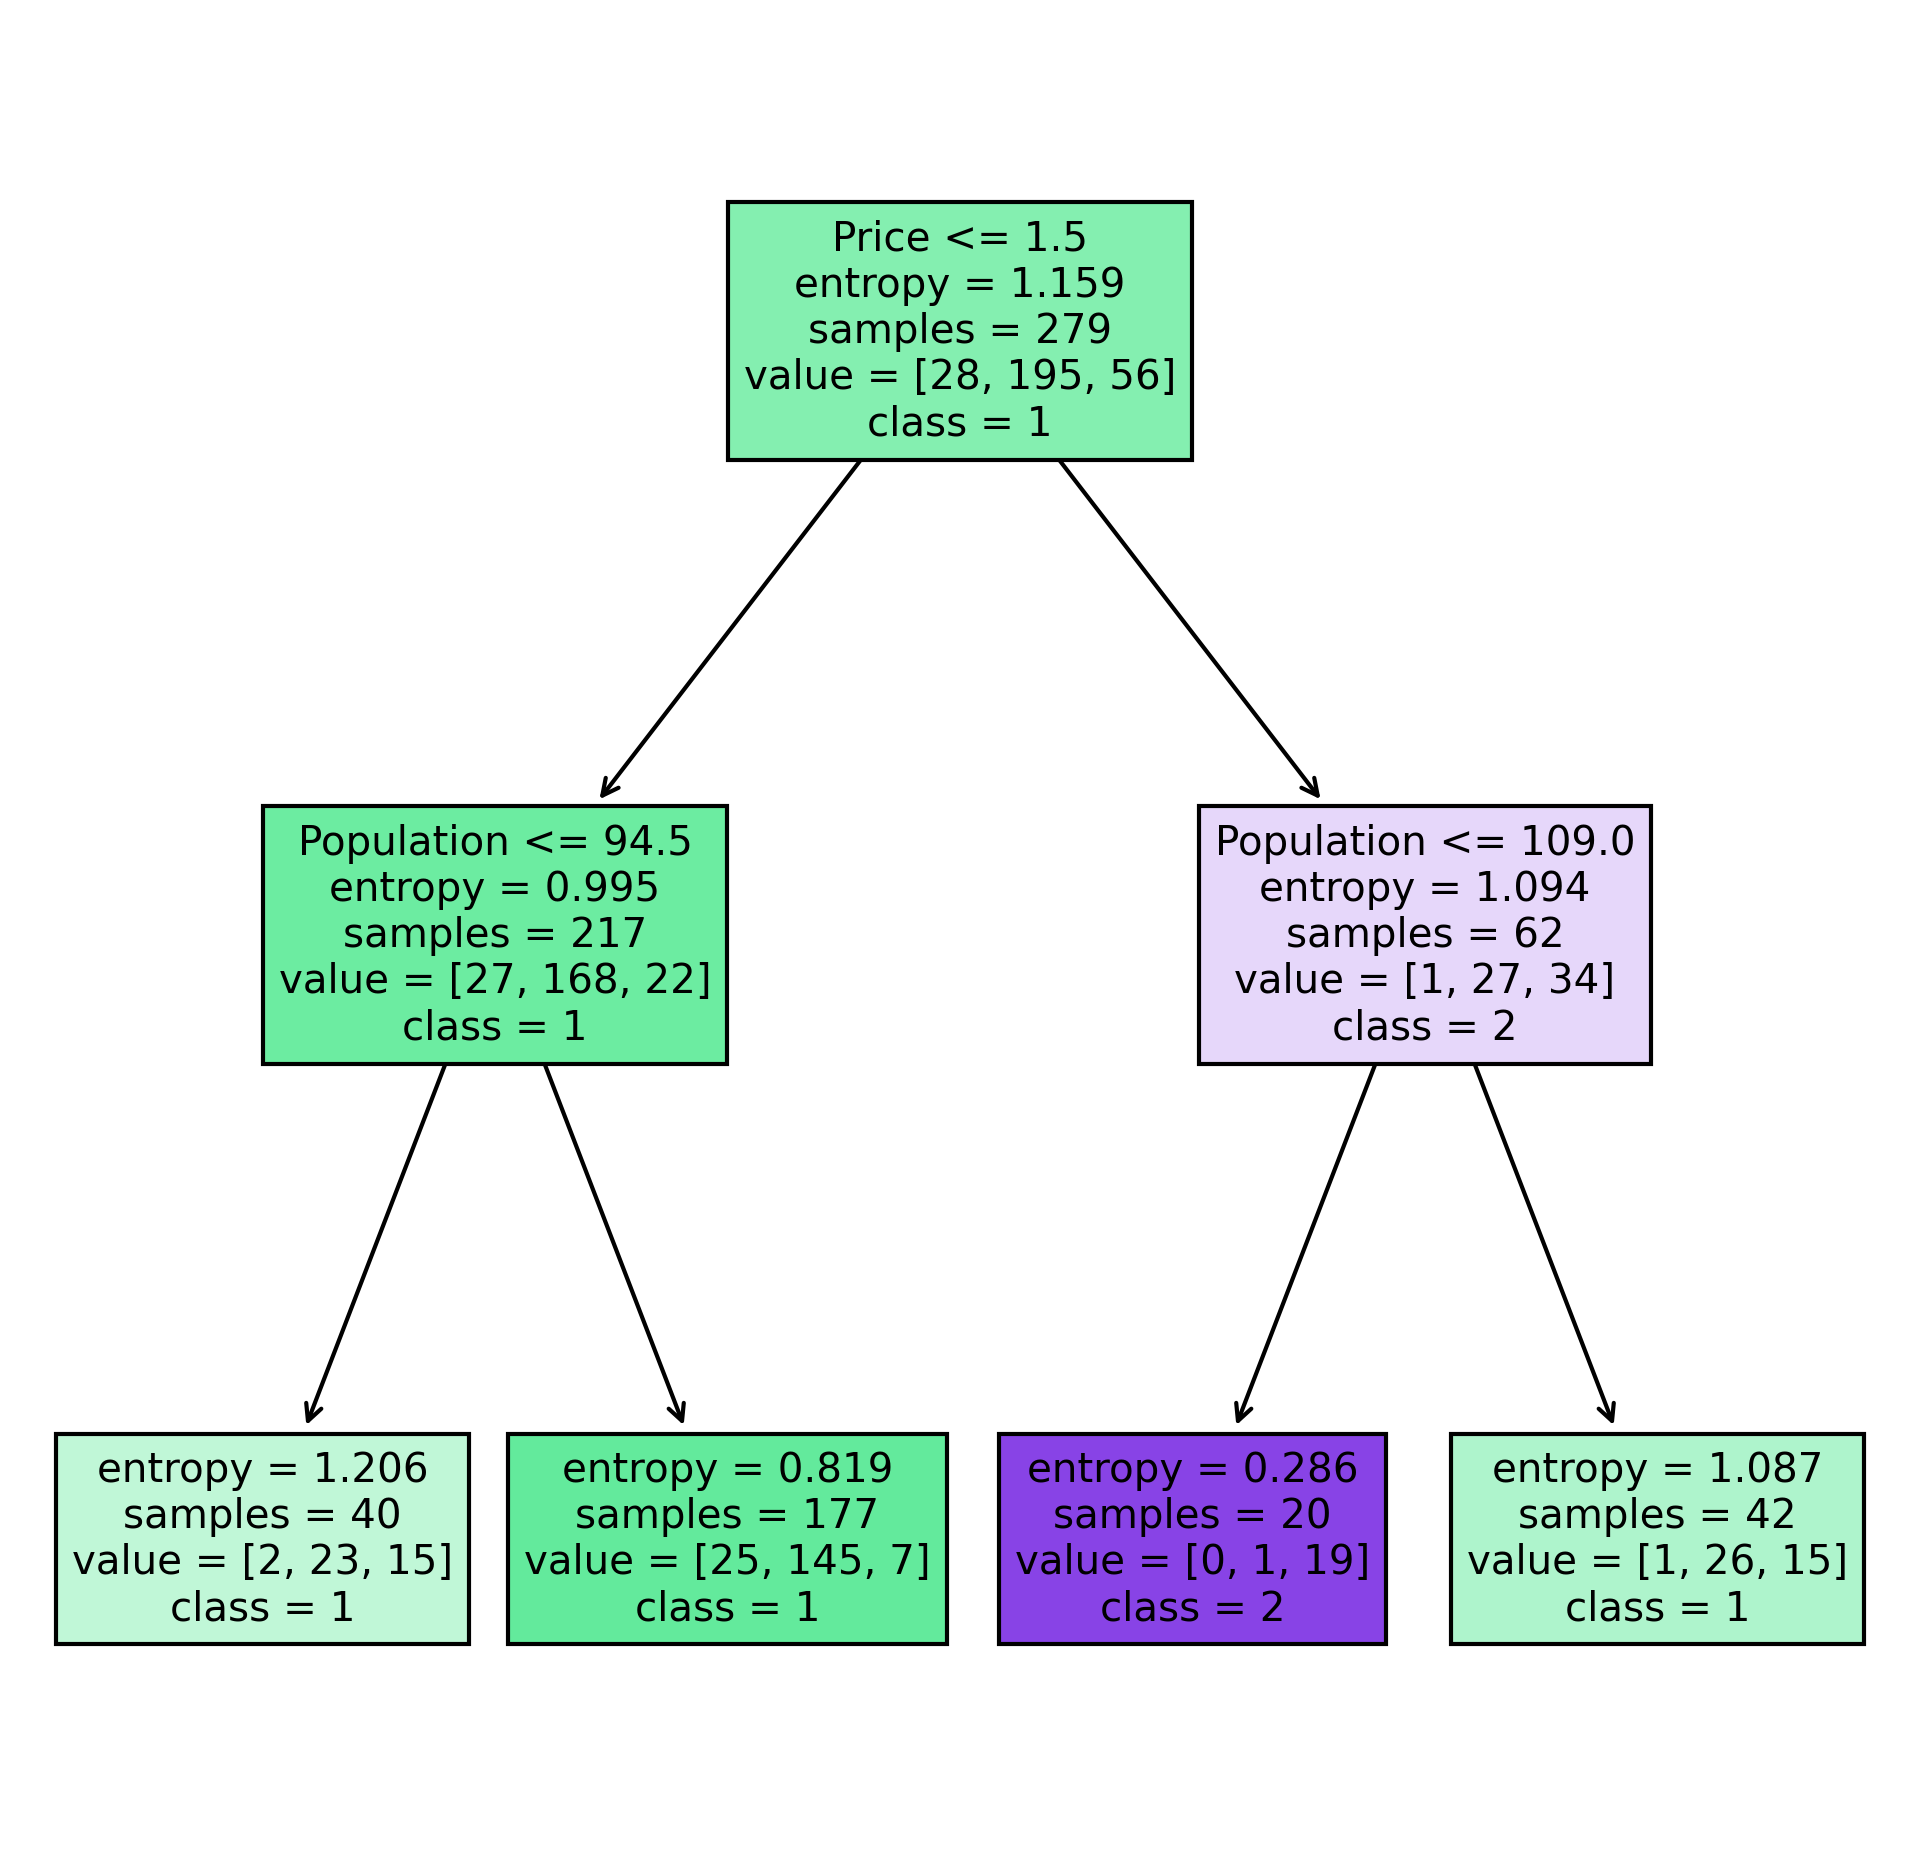

In [104]:
fn=['ShelveLoc','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']
cn=['0', '1', '2']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
plot_tree(model_entro,feature_names=fn,class_names=cn,filled=True)

In [102]:
print(f'The best model would be with entropy criterion and optimum pruning parameters of {best} giving an accuracy of {accu_entro} % ')

The best model would be with entropy criterion and optimum pruning parameters of {'max_depth': 2, 'max_leaf_nodes': 15, 'min_samples_leaf': 1} giving an accuracy of 79.16666666666666 % 


In [103]:
pd.crosstab(y_test,y_pred_entro)

col_0,1,2
Sales,,
0,7,0
1,89,2
2,16,6


In [105]:
cross_val = cross_val_score(model_entro,x_train,y_train,cv=8,scoring='accuracy')

In [106]:
cross_val

array([0.77142857, 0.74285714, 0.71428571, 0.71428571, 0.77142857,
       0.77142857, 0.71428571, 0.85294118])

In [108]:
mean = cross_val.mean()

In [109]:
mean

0.7566176470588235

In [110]:
from sklearn.metrics import f1_score

In [112]:
f1_score = f1_score(y_test,y_pred_entro,average='micro')

In [113]:
f1_score

0.7916666666666666

In [115]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x576 with 0 Axes>

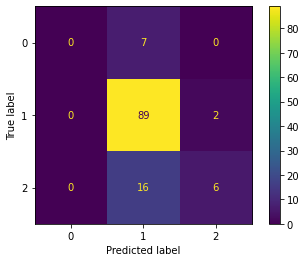

In [117]:
plt.figure(figsize=(12,8))
plot_confusion_matrix(model_entro, x_test,y_test)


In [118]:
rep = classification_report(y_test,y_pred_entro)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
print(rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.79      0.98      0.88        91
           2       0.75      0.27      0.40        22

    accuracy                           0.79       120
   macro avg       0.51      0.42      0.43       120
weighted avg       0.74      0.79      0.74       120

